<a href="https://colab.research.google.com/github/axabb/MEC_20F20754/blob/main/Organic_vs_Resuseable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle 

!cp kaggle.json ~/.kaggle/ 

In [2]:
!kaggle datasets download -d techsash/waste-classification-data

 98% 417M/427M [00:04<00:00, 102MB/s]
100% 427M/427M [00:04<00:00, 96.9MB/s]


In [3]:
import zipfile 
zip_folder = zipfile.ZipFile('/content/waste-classification-data.zip' , 'r') 
zip_folder.extractall('/content') 
zip_folder.close() 

In [4]:
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential 
import matplotlib.pyplot as plt 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout 

In [6]:
train_data = keras.utils.image_dataset_from_directory( 
  directory = '/content/DATASET/TRAIN',
  labels = 'inferred', 
  label_mode = 'int', 
  batch_size = 32, 
  image_size = (256,256),
) 

valid_data = keras.utils.image_dataset_from_directory( 
  directory = '/content/DATASET/TEST',
  labels = 'inferred', 
  label_mode = 'int', 
  batch_size = 32, 
  image_size = (256,256),
)

Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [7]:
def process(image,label): 
      image = tf.cast(image/255. ,tf.float32) 
      return image,label 
train_data = train_data.map(process) 
valid_data = valid_data.map(process) 

In [8]:
# 3 layers in total 

#1st layer has 32 filters 

#2nd layer has 64 filters 

#3rd layer has 128 filters 

Model  = Sequential() 

In [9]:
# 1st layer 

Model.add(Conv2D(32,kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256,3))) 

Model.add(BatchNormalization()) 

Model.add(MaxPooling2D(pool_size=(2,2) ,strides=2, padding = 'valid')) 

# 2nd layer 

Model.add(Conv2D(64,kernel_size=(3,3), padding = 'valid', activation = 'relu')) 

Model.add(BatchNormalization()) 

Model.add(MaxPooling2D(pool_size=(2,2) ,strides=2, padding = 'valid')) 

# 3rd layer 

Model.add(Conv2D(128,kernel_size=(3,3), padding = 'valid', activation = 'relu')) 

Model.add(BatchNormalization()) 

Model.add(MaxPooling2D(pool_size=(2,2) ,strides=2, padding = 'valid')) 

In [10]:
Model.add(Flatten()) 

In [11]:
Model.add(Dense(128, activation = 'relu')) 
Model.add(Dropout(0.1)) 
Model.add(Dense(64, activation = 'relu')) 
Model.add(Dense(1, activation = 'sigmoid')) 

In [12]:
Model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
Model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'] ) 

history = Model.fit(train_data, epochs = 10, validation_data = valid_data) 

Epoch 1/10
706/706 [==============================] - 85s 100ms/step - loss: 1.3261 - accuracy: 0.7684 - val_loss: 1.0265 - val_accuracy: 0.6251
Epoch 2/10
706/706 [==============================] - 69s 97ms/step - loss: 0.4074 - accuracy: 0.8338 - val_loss: 0.3054 - val_accuracy: 0.8858
Epoch 3/10
706/706 [==============================] - 68s 96ms/step - loss: 0.3544 - accuracy: 0.8513 - val_loss: 0.3993 - val_accuracy: 0.8361
Epoch 4/10
706/706 [==============================] - 70s 98ms/step - loss: 0.3220 - accuracy: 0.8684 - val_loss: 0.3707 - val_accuracy: 0.8587
Epoch 5/10
706/706 [==============================] - 70s 99ms/step - loss: 0.3449 - accuracy: 0.8631 - val_loss: 0.3900 - val_accuracy: 0.8014
Epoch 6/10
706/706 [==============================] - 70s 99ms/step - loss: 0.2959 - accuracy: 0.8784 - val_loss: 0.2628 - val_accuracy: 0.8878
Epoch 7/10
706/706 [==============================] - 70s 98ms/step - loss: 0.2499 - accuracy: 0.9013 - val_loss: 0.8442 - val_accuracy

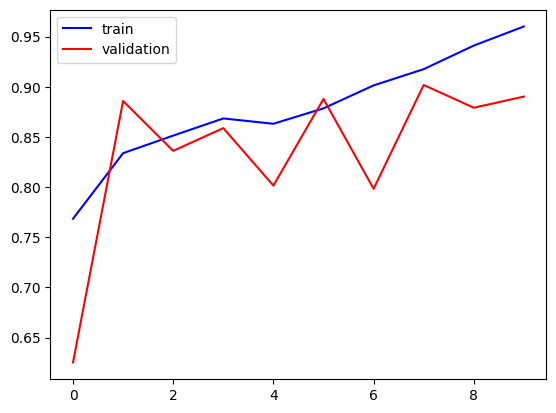

In [14]:
plt.plot(history.history['accuracy'], color='blue', label = 'train') 
plt.plot(history.history['val_accuracy'], color='red', label = 'validation') 
plt.legend() 
plt.show() 

(162, 311, 3)

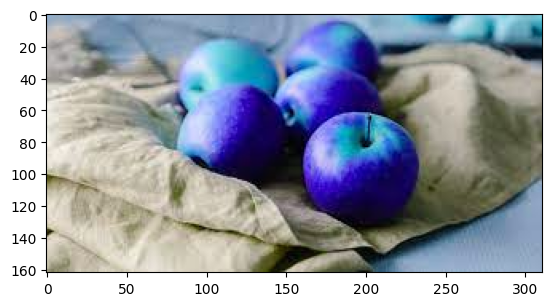

In [30]:
import cv2 

test_image = cv2.imread('/content/organic.jfif') 

plt.imshow(test_image) 

test_image.shape 


In [31]:
test_image  = cv2.resize(test_image,(256,256)) 

test_input = test_image.reshape((1,256,256,3)) 

Model.predict(test_input) 

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)